<a href="https://colab.research.google.com/github/mainak555/lb-ai/blob/ai/Assignment01_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#%% [markdown]
# Q2. Design a code to perform logistic regression on Iris dataset. 
## Make sure to use cross entropy to calculate loss values. 
## Don't use any prebuilt function for logistic regression. Write it on your own

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
print("\
Keys: {}\n\
Data Shape: {}\n\
Type: {} [{}D]\n\
Feature Names: {}\n\
Description: {}\
".format(iris.keys(), iris.data.shape, 
    type(iris.data), iris.data.ndim,
    iris.feature_names, iris.DESCR))

Keys: dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
Data Shape: (150, 4)
Type: <class 'numpy.ndarray'> [2D]
Feature Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Description: .. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.

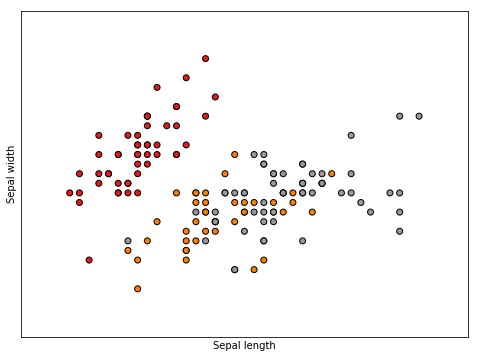

In [3]:
import numpy as np
import matplotlib.pyplot as plt
X = iris.data[:, :2]        #Take the first two features
y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

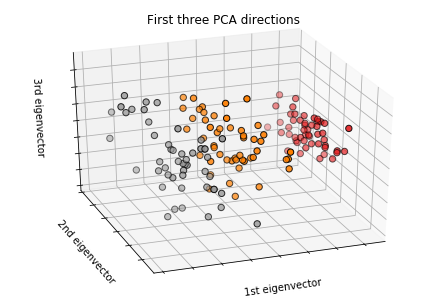

In [4]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
fig = plt.figure()
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=iris['target'],
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])
plt.show()

In [0]:
class LogisticRegression:
    def __init__(self, alpha = 0.0001, iteration = 10000, verbose = (True, 1000)):
        self.alpha = alpha
        self.iteration = iteration
        self.verbose = verbose
        self.theta = np.ndarray
        self.cost = np.ndarray
    
    def print_(self, text, skip=True):        
        if(self.verbose[0] and not skip):
            print(text)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def logistic_sigmoid(self, x):
        return np.exp(x) / 1 + np.exp(x)

    def hx(self, theta, X, n):        
        m = X.shape[0]                                              #Nos. of Records/Rows
        h = np.ones((m, 1))                                         #initializing with 1 for all rows
        theta = theta.reshape(1, n+1)                               #[[theta0....thetaN]] 1D->2D
        for i in range(0, m):
            h[i] = self.sigmoid(float(np.matmul(theta, X[i])))      #1/(1+e^-(theta.T*X))
            #h[i] = self.logistic_sigmoid(float(np.matmul(theta, X[i])))      
            #h[i] = np.exp(np.matmul(theta, X[i]))                   #SoftMax Implementation
        #h = h / sum(h)                                              #SoftMax Implementation
        h = h.reshape(m)                                            #2D->1D/Flatten
        return h

    def loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()    #Cross Entropy

    def gradient_descent(self, theta, h, X, y, n):
        #w = np.random.randn(2)
        iteration_count = 0
        m = X.shape[0]
        self.cost = np.ones(self.iteration)
        for i in range(0, self.iteration):
        #i=0
        #while True:
            iteration_count = 0 if iteration_count >= self.verbose[1] else iteration_count + 1                
            theta[0] = theta[0] - (self.alpha/m) * sum(h - y)   #* x0 Omitted as = 1
            for j in range(1, n+1):
                theta[j] = theta[j] - (self.alpha/m) * sum((h - y) * X.T[j])
            h = self.hx(theta, X, n)
            self.cost[i] = self.loss(h, y)
            self.print_('Cost/Iteration[{}]: {}'.format(i, self.cost[i]), not(iteration_count >= self.verbose[1]))
            #i +=1
        self.theta = theta.reshape(1, n+1)
    
    def fit(self, X, y, algo='gradient_descent'):
        n = X.shape[1]                              #Nos. of Features [x1....xN]
        m = X.shape[0]                              #no. of Rows/Records
        x0 = np.ones((m, 1))
        x = np.concatenate((x0, X), axis = 1)       #New Vector X: [x0, x1...xN]
        theta = np.zeros(n+1)                       #Initialize theta: [theta0...thetaN]
        fx = self.hx(theta, x, n)                   #Initial h for all rows = 1
        self.print_('Initial h(x):\n{}'.format(fx))
        self.gradient_descent(theta, fx, x, y, n)
        return self.theta

    def predict(self, X, showlog=False):
        n = X.shape[1]
        m = X.shape[0]
        x0 = np.ones((m, 1))
        x = np.concatenate((x0, X), axis = 1)
        y_pred_values = self.hx(self.theta, x, n)        
        self.print_('Predicted y:\n{}'.format(y_pred_values), skip=not(showlog))
        
        predicted_class = np.ndarray(m)
        for i in range(0, m):
            if y_pred_values[i] > 0.5:
                predicted_class[i] = 1
            else:
                predicted_class[i] = 0
        return predicted_class, y_pred_values 

    def cost_minimization_curve(self, msg=''):
        plt.plot(np.arange(self.iteration), self.cost.tolist())
        plt.xlabel('cost')
        plt.ylabel('iteration')
        plt.title('Cost Minimisation. {}'.format(msg))
        plt.show()

In [0]:
from sklearn.utils.multiclass import unique_labels
class Matric:
    def __init__(self, y_hat, y_actual):
        self.y_hat = y_hat
        self.y_actual = y_actual       
        self.tp = self.fp = self.fn = self.tn = 0        
        
    def accuracy(self):
        k = 0
        for i in range(0, self.y_hat.shape[0]):
            if self.y_hat[i] == self.y_actual[i]:
                k += 1
        accuracy = k / self.y_actual.shape[0]
        return accuracy

    def precision_recall_f1(self):
        precision = recall = f1 = np.inf
        for i in range(0, self.y_hat.shape[0]):
            if self.y_hat[i] == self.y_actual[i] == 0:
                self.tp += 1
            elif self.y_hat[i] == 0 and self.y_actual[i] == 1:
                self.fp += 1
            elif self.y_hat[i] == 1 and self.y_actual[i] == 0:
                self.fn += 1
            elif self.y_hat[i] == self.y_actual[i] == 1:
                self.tn += 1
        try:
            precision = self.tp / (self.tp + self.fp)
        except:
            pass
        try:
            recall = self.tp / (self.tp + self.fn)  
        except:
            pass  
        if precision != np.inf or recall != np.inf:
            f1 = 2 * precision * recall / (precision + recall)
        return precision, recall, f1

    def plot_confusion_matrix(self, normalized=False, class_names=np.ndarray(0)):
        confusion_matrix = np.array([[self.tp, self.fn], [self.fp, self.tn]])
        if(normalized):
            confusion_matrix = confusion_matrix.astype('float') / confusion_matrix.sum(axis = 1)[:, np.newaxis]
        print('Confusion Matrix:\n{}'.format(confusion_matrix))
                
        classes = np.ndarray([0, 1])
        if len(class_names) > 0:
            #classes = class_names[unique_labels(self.y_hat, self.y_actual).astype(np.int)]
            classes = class_names

        fig, ax = plt.subplots()
        im = plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
        ax.figure.colorbar(im, ax = ax)
        ax.set(
            xticks=np.arange(confusion_matrix.shape[1]),
            yticks=np.arange(confusion_matrix.shape[0]),
            # ... and label them with the respective list entries
            xticklabels = classes, yticklabels = classes,
            title = 'Confusion Matrix {}'.format('(Normalized)' if normalized else ''),
            ylabel = 'True label',
            xlabel = 'Predicted label')
                
        plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")       #Rotate the tick labels and set their alignment
        
         #Loop over data dimensions and create text annotations
        fmt = '.2f' if normalized else 'd'
        threshold = confusion_matrix.max() / 2.
        for i in range(confusion_matrix.shape[0]):
            for j in range(confusion_matrix.shape[1]):
                ax.text(j, i, 
                    format(confusion_matrix[i, j], fmt), ha='center', va='center',
                    color= 'white' if confusion_matrix[i, j] > threshold else 'black'
                    )
        fig.tight_layout()
        plt.show()

In [7]:
import sklearn.model_selection as skModel
X_train, X_test, y_train, y_test = skModel.train_test_split(iris['data'], iris['target'], random_state = 42)
print("X_train: ", X_train.shape, "X_test: ", X_test.shape)
#%%
import pandas as pd
def train_test_df(x_train, y_train, x_test, y_test):
    df_train = pd.DataFrame(X_train)
    df_train.columns = iris.feature_names
    df_train['class'] = y_train
    df_test = pd.DataFrame(X_test)
    df_test.columns = iris.feature_names
    df_test['class'] = y_test
    return df_train, df_test

df_train, df_test = train_test_df(X_train, y_train, X_test, y_test)
df_train[df_train['class'] != 2][:5]
df_train.describe()

X_train:  (112, 4) X_test:  (38, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
count,112.000000,112.000000,112.000000,112.000000,112.000000
mean,5.830357,3.040179,3.807143,1.214286,1.026786
std,0.819123,0.437120,1.735310,0.747953,0.810514
min,4.300000,2.000000,1.100000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.300000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.700000,4.200000,6.700000,2.500000,2.000000


In [8]:
filter_by_column_value = lambda df, colName, colValue: df[df[colName] != colValue]

train_set_01 = filter_by_column_value(df_train, 'class', 2)
train_set_12 = filter_by_column_value(df_train, 'class', 0)
train_set_20 = filter_by_column_value(df_train, 'class', 1)

train_set_01[:5]
train_set_12[:5]
train_set_20[:5]

test_set_01 = filter_by_column_value(df_test, 'class', 2)
test_set_12 = filter_by_column_value(df_test, 'class', 0)
test_set_20 = filter_by_column_value(df_test, 'class', 1)

test_set_01[:5]
test_set_12[:5]
test_set_20[:5]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
1,5.7,3.8,1.7,0.3,0
2,7.7,2.6,6.9,2.3,2
5,5.4,3.4,1.5,0.4,0
7,6.9,3.1,5.1,2.3,2
10,6.5,3.2,5.1,2.0,2


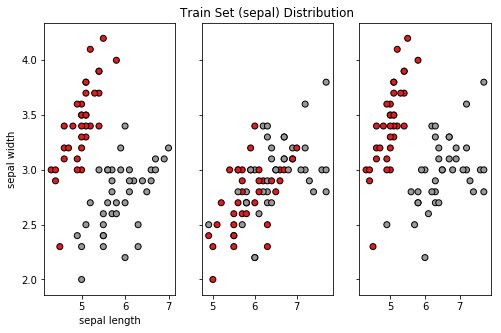

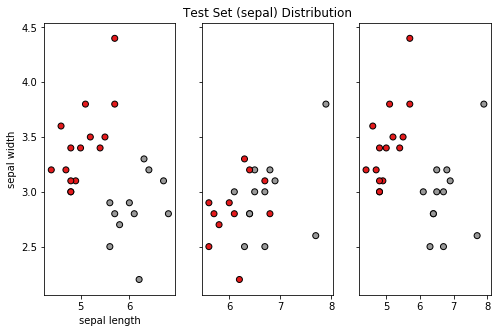

In [9]:
#Visualisation of Training & Test set on basis of Sepal Features
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(8, 5))
ax1.scatter(train_set_01.iloc[:, 0], train_set_01.iloc[:, 1], c=train_set_01.iloc[:,-1:]['class'], cmap=plt.cm.Set1, edgecolor='k')
ax2.scatter(train_set_12.iloc[:, 0], train_set_12.iloc[:, 1], c=train_set_12.iloc[:,-1:]['class'], cmap=plt.cm.Set1, edgecolor='k')
ax3.scatter(train_set_20.iloc[:, 0], train_set_20.iloc[:, 1], c=train_set_20.iloc[:,-1:]['class'], cmap=plt.cm.Set1, edgecolor='k')
ax1.set_xlabel('sepal length')
ax1.set_ylabel('sepal width')
ax2.set_title('Train Set (sepal) Distribution')
plt.show()

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(8, 5))
ax1.scatter(test_set_01.iloc[:, 0], test_set_01.iloc[:, 1], c=test_set_01.iloc[:,-1:]['class'], cmap=plt.cm.Set1, edgecolor='k')
ax2.scatter(test_set_12.iloc[:, 0], test_set_12.iloc[:, 1], c=test_set_12.iloc[:,-1:]['class'], cmap=plt.cm.Set1, edgecolor='k')
ax3.scatter(test_set_20.iloc[:, 0], test_set_20.iloc[:, 1], c=test_set_20.iloc[:,-1:]['class'], cmap=plt.cm.Set1, edgecolor='k')
ax1.set_xlabel('sepal length')
ax1.set_ylabel('sepal width')
ax2.set_title('Test Set (sepal) Distribution')
plt.show()

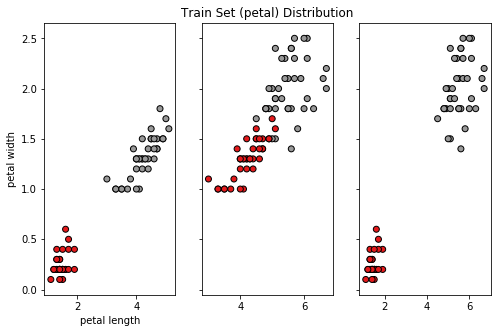

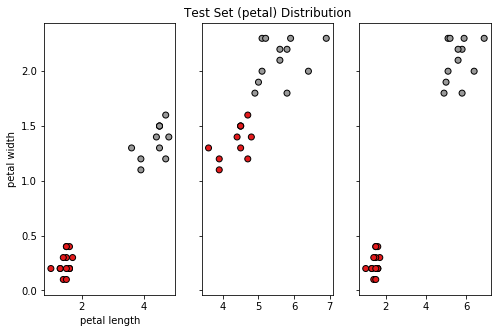

'\nHence Taking Petal data for regession\n'

In [10]:
#Visualisation of Training & Test set on basis of Petal Features
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(8, 5))
ax1.scatter(train_set_01.iloc[:, 2], train_set_01.iloc[:, 3], c=train_set_01.iloc[:,-1:]['class'], cmap=plt.cm.Set1, edgecolor='k')
ax2.scatter(train_set_12.iloc[:, 2], train_set_12.iloc[:, 3], c=train_set_12.iloc[:,-1:]['class'], cmap=plt.cm.Set1, edgecolor='k')
ax3.scatter(train_set_20.iloc[:, 2], train_set_20.iloc[:, 3], c=train_set_20.iloc[:,-1:]['class'], cmap=plt.cm.Set1, edgecolor='k')
ax1.set_xlabel('petal length')
ax1.set_ylabel('petal width')
ax2.set_title('Train Set (petal) Distribution')
plt.show()

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(8, 5))
ax1.scatter(test_set_01.iloc[:, 2], test_set_01.iloc[:, 3], c=test_set_01.iloc[:,-1:]['class'], cmap=plt.cm.Set1, edgecolor='k')
ax2.scatter(test_set_12.iloc[:, 2], test_set_12.iloc[:, 3], c=test_set_12.iloc[:,-1:]['class'], cmap=plt.cm.Set1, edgecolor='k')
ax3.scatter(test_set_20.iloc[:, 2], test_set_20.iloc[:, 3], c=test_set_20.iloc[:,-1:]['class'], cmap=plt.cm.Set1, edgecolor='k')
ax1.set_xlabel('petal length')
ax1.set_ylabel('petal width')
ax2.set_title('Test Set (petal) Distribution')
plt.show()

'''
Hence Taking Petal data for regession
'''

Cost/Iteration[4999]: 0.5724183038538007
Cost/Iteration[10000]: 0.5467971786679023
Cost/Iteration[15001]: 0.5284342983999163
Cost/Iteration[20002]: 0.5115249482235948
Cost/Iteration[25003]: 0.4954598124219845
Cost/Iteration[30004]: 0.4801373975084666
Cost/Iteration[35005]: 0.46551542178217215
Cost/Iteration[40006]: 0.45155959265758416
Cost/Iteration[45007]: 0.43823744882642124
Cost/Iteration[50008]: 0.42551768743853746
Cost/Iteration[55009]: 0.41337015073817446
Cost/Iteration[60010]: 0.4017658703588837
Cost/Iteration[65011]: 0.39067709876066004
Cost/Iteration[70012]: 0.38007732328167726
Cost/Iteration[75013]: 0.36994126544756695


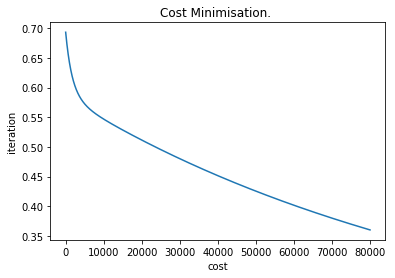

Thetas[01]: [[-1.1381211   0.5096443   0.55804671]]
Predicted y:
[0.87290181 0.47394567 0.87999135 0.88987225 0.46246177 0.80566101
 0.87999135 0.82041294 0.40882753 0.40999787 0.42119981 0.44862182
 0.89567642 0.81204345 0.86769598 0.44742484 0.4751526  0.43605089
 0.44742484 0.37358502 0.46246177 0.86825065 0.44742484 0.40999787
 0.87999135 0.43486099]
Accuracy: 1.0, 
(Precision, Recall, F1): (1.0, 1.0, 1.0)
Confusion Matrix:
[[15  0]
 [ 0 11]]


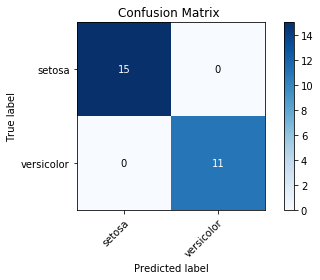

In [46]:
lm = LogisticRegression(iteration=80000, verbose=(True, 5000))
theta_01 = lm.fit(train_set_01.iloc[:,2:4], train_set_01.iloc[:,-1:]['class'])
lm.cost_minimization_curve()
print('Thetas[01]: {}'.format(lm.theta))

y_pred_01, y_pred_01_values = lm.predict(test_set_01.iloc[:, 2:4], showlog=True)
matric_01 = Matric(y_pred_01, test_set_01.iloc[:,-1:].reset_index()['class'], [0, 1])
pre_re_f1_01 = matric_01.precision_recall_f1() 
print('Accuracy: {}, \n(Precision, Recall, F1): {}'.format(matric_01.accuracy(), pre_re_f1_01))
matric_01.plot_confusion_matrix(normalized=False, class_names=iris.target_names)

In [44]:
y_pred_01

array([1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       0., 1., 0., 1., 1., 1., 0., 1., 0.])

In [45]:
y_pred_01_values

array([0.85189712, 0.52766216, 0.85615182, 0.8666773 , 0.51630291,
       0.78917013, 0.85615182, 0.80347167, 0.47578653, 0.47507599,
       0.48644038, 0.50635114, 0.87089259, 0.7971064 , 0.84606056,
       0.50706327, 0.52695202, 0.49568211, 0.50706327, 0.44329192,
       0.51630291, 0.84568912, 0.50706327, 0.47507599, 0.85615182,
       0.49639433])

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Cost/Iteration[1999]: 0.5316498269955885
Cost/Iteration[4000]: 0.46045525607462984
Cost/Iteration[6001]: 0.42041080603861936
Cost/Iteration[8002]: 0.3934285791452123
Cost/Iteration[10003]: 0.3729697058352912
Cost/Iteration[12004]: 0.3562389613181206
Cost/Iteration[14005]: 0.34187460189974367
Cost/Iteration[16006]: 0.32914272937034006
Cost/Iteration[18007]: 0.3176147438046409
Thetas[12]: [[-0.30416588  0.65105386  0.20187206]]


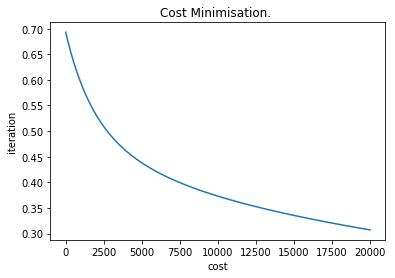

In [105]:

train_set_12.loc[train_set_12['class'] == 2] = 0
lm = LogisticRegression(iteration=20000, verbose=(True, 2000))
theta_12 = lm.fit(train_set_12.iloc[:,2:4], train_set_12.iloc[:,-1:]['class'])
print('Thetas[12]: {}'.format(lm.theta))
lm.cost_minimization_curve()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Predicted y:
[0.42453942 0.95019594 0.95515217 0.90942263 0.42453942 0.42453942
 0.9449605  0.42453942 0.93659416 0.42453942 0.94923188 0.42453942
 0.92870911 0.89810963 0.42453942 0.93659416 0.93538471 0.42453942
 0.94035232 0.42453942 0.42453942 0.42453942 0.92427642 0.94923188
 0.42453942 0.92840769 0.88556146 0.42453942 0.9162074  0.96423226
 0.42453942 0.96023773 0.8665803  0.42453942 0.96574953 0.42453942
 0.42453942 0.92840769 0.42453942 0.42453942 0.96041085 0.42453942
 0.42453942 0.42453942 0.95427943 0.95227916 0.42453942 0.95427943
 0.42453942 0.42453942 0.93894997 0.42453942 0.89810963 0.92536406
 0.95135336 0.95041053 0.9428225  0.93261617 0.42453942 0.42453942
 0.88556146 0.42453942 0.42453942 0.42453942 0.96041085 0.42453942
 0.42453942 0.93261617 0.42453942 0.94390108 0.94035232 0.42453942
 0.42453942 0.92840769 0.42453942 0.92705425 0.42453942]
Accuracy: 1.0, 
(Precision, Recall, F1): (1.0, 1.0, 1.0)
Confusion Matrix:
[[38  0]
 [ 0 39]]


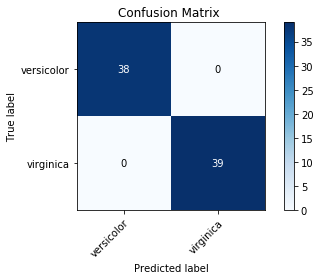

In [107]:
train_set_12.loc[train_set_12['class'] == 2] = 0
y_pred_12, y_pred_12_values = lm.predict(train_set_12.iloc[:,2:4], showlog=True)

matric_12= Matric(y_pred_12, train_set_12.iloc[:,-1:].reset_index()['class'])
prf1_12 = matric_12.precision_recall_f1() 
print('Accuracy: {}, \n(Precision, Recall, F1): {}'.format(matric_12.accuracy(), prf1_12))
matric_12.plot_confusion_matrix(normalized=False, class_names=iris.target_names[1:3])

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Cost/Iteration[4999]: 0.6693014940794795
Cost/Iteration[10000]: 0.6466910150003263
Cost/Iteration[15001]: 0.6252156512283082
Thetas[20]: [[ 0.02798958 -0.18435776  0.37638927]]


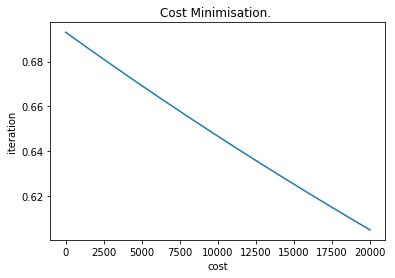

In [72]:
train_set_20.loc[train_set_20['class'] == 2] = 1
lm = LogisticRegression(iteration=20000, verbose=(True, 5000))
theta_20 = lm.fit(train_set_20.iloc[:,2:4], train_set_20.iloc[:,-1:]['class'])
print('Thetas[20]: {}'.format(lm.theta))
lm.cost_minimization_curve()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Predicted y:
[0.45698117 0.55478444 0.47552175 0.55478444 0.55478444 0.45202991
 0.46595336 0.44746755 0.46614431 0.55478444 0.55478444 0.45221999
 0.55478444 0.47092605 0.55478444 0.55478444 0.55478444 0.55478444
 0.55478444 0.47073486 0.45221999 0.47973852 0.47552175 0.45221999
 0.46595336 0.55478444 0.45679075]
Accuracy: 1.0, 
(Precision, Recall, F1): (1.0, 1.0, 1.0)
Confusion Matrix:
[[15  0]
 [ 0 12]]


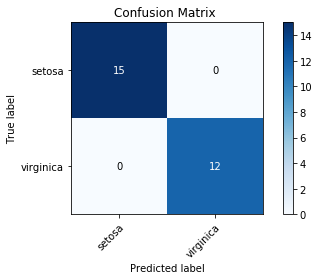

In [104]:
test_set_20.loc[test_set_20['class'] == 2] = 1
y_pred_20, y_pred_20_values = lm.predict(test_set_20.iloc[:,2:4], showlog=True)
matric_20 = Matric(y_pred_20, test_set_20.iloc[:,-1:].reset_index()['class'])
prf1_20 = matric_20.precision_recall_f1() 
print('Accuracy: {}, \n(Precision, Recall, F1): {}'.format(matric_20.accuracy(), prf1_20))
matric_20.plot_confusion_matrix(normalized=False, class_names=[iris.target_names[i] for i in (0, 2)])